In [1]:
'''
#Gigacow-tools# - preprocessing
This scripts used for Gigacow data cleaning work.
Data Tables: gigacow.csv, lactation.csv, traffic.csv, robot.csv
'''

import pandas as pd
import numpy as np
from pathlib import Path

#access data from local directory
dataDir = Path.cwd().parent.parent/'Data'

#filter out irrelevant columns
gigacow_cols = ['Gigacow_Cow_Id', 'FarmName_Pseudo', 'BreedName', 'BirthDate']
lactation_cols = ['Gigacow_Cow_Id', 'FarmName_Pseudo', 'LactationInfoDate', 'LactationNumber', 'DaysInMilk']
traffic_cols = ['Traffic_Id', 'FarmName_Pseudo', 'GroupName', 'Gigacow_Cow_Id', 'TrafficEventDateTime', 'PreviousArea', 'TimeInArea_totalSeconds', 'TrafficDeviceName', 'TrafficResult', 'MilkingInterval_totalSeconds']
robot_cols = ['MilkRobot_Id', 'FarmName_Pseudo', 'Gigacow_Cow_Id', 'MilkingStartDateTime', 'SessionNumber', 'EquipmentName', 'TotalYield', 'MilkingUnitName']
dry_cols = ['FarmName_Pseudo', 'Gigacow_Cow_Id', 'DryOffDate']
calving_cols = ['FarmName_Pseudo', 'Gigacow_Cow_Id', 'CalvingDate']
gigacow = pd.read_csv(dataDir/'gigacow.csv', usecols=gigacow_cols, encoding='utf-8')
lactation = pd.read_csv(dataDir/'lactation.csv', usecols=lactation_cols, encoding='utf-8')
traffic_milk = pd.read_csv(dataDir/'traffic_milking.csv', usecols=traffic_cols, encoding='utf-8')
robot = pd.read_csv(dataDir/'robot.csv', usecols=robot_cols, encoding='utf-8')
dry = pd.read_csv(dataDir/'dry.csv', usecols=dry_cols, encoding='utf-8')
calving = pd.read_csv(dataDir/'calving.csv', usecols=calving_cols, encoding='utf-8')
traffic_a624fb9a = pd.read_csv(dataDir/'traffic_a624fb9a.csv', usecols=traffic_cols, encoding='utf-8')
traffic_f454e660 = pd.read_csv(dataDir/'traffic_f454e660.csv', usecols=traffic_cols, encoding='utf-8', engine='python', on_bad_lines='skip')
#data table: gigacow 
#target farms: f454e660, a624fb9a
farm_list = ['f454e660', 'a624fb9a']
gigacow = gigacow.loc[gigacow['FarmName_Pseudo'].isin(farm_list)]
#drop cows without birthdate
gigacow = gigacow.dropna(subset=['BirthDate'])
#calculate age of cows
#gigacow['Age'] = gigacow.apply(lambda x: countCowAge(x['BirthDate'], x['CullDecisionDate']), axis=1)
#gigacow.drop(['BirthDate', 'CullDecisionDate'], axis=1, inplace=True)
#drop the farm name column
#gigacow.drop('FarmName_Pseudo', axis=1, inplace=True)
#extract Breed Name(keep only number 01-99) and mark other number as 00("catch all")
gigacow['BreedName'].replace(r"[^0-9]+","", inplace=True, regex=True)
gigacow['BreedName'].replace(r"(18)[67]+","00", inplace=True, regex=True)

In [2]:
gigacow.to_csv(dataDir/'processed/gigacow_filter.csv')
gigacow

,Gigacow_Cow_Id,FarmName_Pseudo,BreedName,BirthDate
0,2,f454e660,01,2017-05-23
1,7,a624fb9a,01,2020-10-28
2,10,f454e660,01,2013-07-06
3,16,f454e660,99,2021-12-30
4,17,f454e660,01,2018-10-18
...,...,...,...,...
1083,6472,f454e660,04,2018-12-27
1084,6484,a624fb9a,02,2020-11-11
1085,6485,f454e660,02,2018-09-13
1086,6487,f454e660,02,2018-01-31


,FarmName_Pseudo,Gigacow_Cow_Id,LactationInfoDate,LactationNumber,DaysInMilk
54637,a624fb9a,1200,2020-01-31,5,297.0
50701,a624fb9a,1200,2020-02-01,5,298.0
55710,a624fb9a,1200,2020-02-02,5,299.0
51116,a624fb9a,1200,2020-02-03,5,300.0
73313,a624fb9a,1200,2020-02-04,5,301.0
...,...,...,...,...,...
53645,a624fb9a,1200,2022-08-20,8,87.0
55009,a624fb9a,1200,2022-08-21,8,88.0
178437,a624fb9a,1200,2022-08-22,8,89.0
54368,a624fb9a,1200,2022-08-23,8,90.0


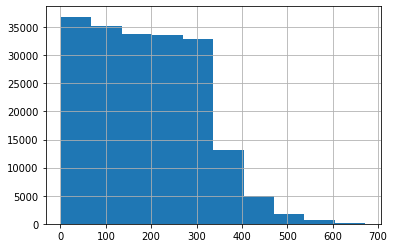

In [6]:
'''data table: lactation'''
#target farms: f454e660, a624fb9a
lactation = lactation.loc[lactation['FarmName_Pseudo'].isin(farm_list)]
#drop the farm name column
#lactation.drop('FarmName_Pseudo', axis=1, inplace=True)

#drop anomalies in DaysinMilk
#lactation = lactation.loc[lactation['DaysInMilk'] <= 330]

#Lactation Period
#plot the histogram of cows days in milk
lactation.dropna(subset=['DaysInMilk'], axis=0, inplace=True)
lactation.DaysInMilk.hist()
lactation.DaysInMilk.describe()

#test how the DelPro calculate DaysInMilk
#select specific cow and sort the records by the LactationInfoDate
test = lactation.loc[lactation['Gigacow_Cow_Id'] == 1200]
test.sort_values(by='LactationInfoDate')

#merge table lactation and robot
#robot_lactation = robot.merge(lactation, how='left', on='Gigacow_Cow_Id')

In [7]:
lactation.to_csv(dataDir/'processed/lactation_filter.csv')

In [8]:
lactation.DaysInMilk.describe()

count    192802.000000
mean        189.556213
std         117.976580
min           1.000000
25%          90.000000
50%         183.000000
75%         278.000000
max         672.000000
Name: DaysInMilk, dtype: float64

In [9]:
'''data table: traffic_milking(only contain records for MilkingEvents)'''

#target farms: f454e660, a624fb9a
traffic_milk = traffic_milk.loc[traffic_milk['FarmName_Pseudo'].isin(farm_list)]
#drop the farm name column
traffic_milk.drop('FarmName_Pseudo', axis=1, inplace=True)
#Unifiy traffic device name(vms1 & vms2)
traffic_milk['TrafficDeviceName'].replace(r"[A-Za-z]+\s*","vms", inplace=True, regex=True)
#extract traffic result(milk production)
traffic_milk['TrafficResult'].replace(r"[^0-9.,]+"," ", inplace=True, regex=True)
traffic_milk['TrafficResult'].replace(r"\s*","", inplace=True, regex=True)
traffic_milk['TrafficResult'].replace(r"[,]+",".", inplace=True, regex=True)
traffic_milk['TrafficResult'] = traffic_milk['TrafficResult'].astype('float64')
traffic_milk.drop_duplicates(subset=['Gigacow_Cow_Id', 'TrafficEventDateTime'], inplace=True)
traffic_milk.to_csv(dataDir/'processed/traffic_milk_filter.csv')
#print(traffic['TrafficResult'])
traffic_milk

,Traffic_Id,Gigacow_Cow_Id,GroupName,TrafficEventDateTime,PreviousArea,TimeInArea_totalSeconds,TrafficDeviceName,TrafficResult,MilkingInterval_totalSeconds
0,10,730,Vms kor (144 platser),2022-04-01 10:19:56,Mjölkfålla,120,vms1,19.13,37020
1,18,849,Vms kor (144 platser),2021-12-19 02:56:41,Mjölkfålla,0,vms1,20.00,35460
2,19,2844,Vms kor (144 platser),2022-02-04 17:45:51,Mjölkfålla,4260,vms1,12.10,31860
3,22,2460,Vms kor (144 platser),2022-07-21 11:44:29,Foderbord,8220,vms1,6.56,38760
4,50,2724,Vms kor (144 platser),2022-06-24 11:13:36,Mjölkfålla,2520,vms1,12.91,38040
...,...,...,...,...,...,...,...,...,...
828007,10721091,3194,VMS 1,2021-04-28 18:40:32,Mjolkfalla,840,vms2,20.11,34140
828008,10721108,2040,VMS 1,2021-10-16 12:10:01,Mjolkfalla,1740,vms1,5.91,3780
828009,10721124,315,VMS 1,2020-12-24 04:28:55,Mjolkfalla,720,vms2,10.03,29280
828011,10721149,708,VMS 1,2022-07-19 10:28:03,Koridor till Sorteringsgrind 2,360,vms2,7.03,43740


In [10]:
'''data table: robot'''

#target farms: f454e660, a624fb9a
robot = robot.loc[robot['FarmName_Pseudo'].isin(farm_list)]
#drop the farm name column
#robot.drop('FarmName_Pseudo', axis=1, inplace=True)
#Unifiy robot equipment name(vms1 & vms2)
robot['EquipmentName'].replace(r"[A-Za-z]+\s*","vms", inplace=True, regex=True)
robot['MilkingUnitName'].replace(r"[A-Za-z]+\s*","vms", inplace=True, regex=True)

'''
    Q:check if equipmentName and milkingUnitName are exact same
    result:rows equipmentName and milkingUnitName are exact same
'''
#robot['EquipmentName'].equals(['MilkingUnitName'])
#robot['New'] = robot.apply(lambda x: x['EquipmentName'] if x['EquipmentName'] == x['MilkingUnitName'] else np.nan, axis=1)
#robot.to_csv('robot_filter.csv')
robot.drop('MilkingUnitName', axis=1, inplace=True)

#drop NA value in data table robot
robot.dropna(subset=['TotalYield'], axis=0, inplace=True)
robot.to_csv(dataDir/'processed/robot_filter.csv')
robot


,MilkRobot_Id,FarmName_Pseudo,Gigacow_Cow_Id,MilkingStartDateTime,SessionNumber,EquipmentName,TotalYield
0,1,a624fb9a,3300,2019-11-27 00:04:00,1.0,vms1,8.53
1,2,a624fb9a,3674,2019-11-27 00:36:00,1.0,vms2,11.16
2,3,a624fb9a,992,2019-11-27 01:14:00,1.0,vms1,8.33
3,4,a624fb9a,3194,2019-11-27 01:49:00,1.0,vms2,13.47
4,5,a624fb9a,5348,2019-11-27 02:05:00,1.0,vms2,14.26
...,...,...,...,...,...,...,...
504048,1062852,a624fb9a,1585,2021-12-02 12:24:00,1.0,vms2,9.86
504049,1062858,f454e660,5246,2021-05-09 08:05:00,1.0,vms1,16.20
504050,1062859,f454e660,2354,2021-07-24 17:18:00,2.0,vms2,12.75
504051,1062860,f454e660,1244,2022-06-05 04:07:00,1.0,vms1,11.20


In [ ]:
'''
    check if TrafficResult and total TotalYield are same
    result: part same, robot results include traffic results
'''
#apply full outer join on two data tables
#robot_traffic = robot.merge(traffic, how='outer', on='Gigacow_Cow_Id')

In [11]:
'''data table: dry'''

#target farms: f454e660, a624fb9a
dry = dry.loc[dry['FarmName_Pseudo'].isin(farm_list)]
dry.to_csv(dataDir/'processed/dry_filter.csv')
dry

,FarmName_Pseudo,Gigacow_Cow_Id,DryOffDate
0,a624fb9a,4976,2020-04-10
1,a624fb9a,4976,2021-05-15
2,a624fb9a,4976,2022-07-14
3,f454e660,5142,2021-09-16
4,a624fb9a,5235,2022-05-07
...,...,...,...
410,f454e660,2720,2022-05-02
411,f454e660,3071,2021-11-06
412,f454e660,3071,2020-10-01
413,a624fb9a,3173,2020-05-18


In [12]:
'''data table: calving'''

#target farms: f454e660, a624fb9a
calving = calving.loc[calving['FarmName_Pseudo'].isin(farm_list)]
calving.to_csv(dataDir/'processed/calving_filter.csv')
calving

,FarmName_Pseudo,Gigacow_Cow_Id,CalvingDate
0,a624fb9a,4976,2021-07-01
1,a624fb9a,4976,2019-06-27
2,a624fb9a,4976,2019-06-27
3,a624fb9a,4976,2020-06-14
4,a624fb9a,5076,2022-01-31
...,...,...,...
892,a624fb9a,6352,2019-08-29
893,a624fb9a,6363,2019-11-17
894,a624fb9a,6363,2019-11-17
895,a624fb9a,6363,2020-12-18


C:\Users\Savior_Hn\AppData\Local\Temp\ipykernel_29224\3086649276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_time['trafficDate'] = traffic_time['TrafficEventDateTime'].str.slice(start=0, stop=13, step=1)
C:\Users\Savior_Hn\AppData\Local\Temp\ipykernel_29224\3086649276.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robot_time['robotDate'] = robot_time['MilkingStartDateTime'].str.slice(start=0, stop=13, step=1)


count    289107.000000
mean         29.671578
std          17.744677
min        -159.000000
25%          15.000000
50%          30.000000
75%          45.000000
max        1373.000000
Name: timeDelta, dtype: float64

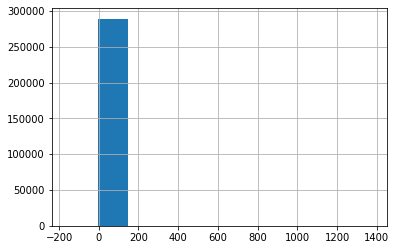

In [13]:
'''check the time difference between trafficEventTime and robotMilkingTime'''

traffic_time = traffic_milk[['Gigacow_Cow_Id', 'TrafficEventDateTime', 'TrafficResult']]
robot_time = robot[['FarmName_Pseudo', 'Gigacow_Cow_Id', 'MilkingStartDateTime', 'TotalYield']]

#@deprecated
#try to creat new join date key
#but exist multiple records with same totalYield on the same date
#traffic_time['TrafficEventDateTime'] = pd.to_datetime(traffic_time['TrafficEventDateTime'])
#robot_time['MilkingStartDateTime'] = pd.to_datetime(robot_time['MilkingStartDateTime'])
#traffic_time['trafficDate'] = traffic_time['TrafficEventDateTime'].dt.date
#robot_time['robotDate'] = robot_time['MilkingStartDateTime'].dt.date

#use string slice to create a join key
traffic_time['trafficDate'] = traffic_time['TrafficEventDateTime'].str.slice(start=0, stop=13, step=1)
robot_time['robotDate'] = robot_time['MilkingStartDateTime'].str.slice(start=0, stop=13, step=1)
traffic_robot = robot_time.merge(traffic_time, how='inner', left_on=['Gigacow_Cow_Id', 'TotalYield','robotDate'], right_on=['Gigacow_Cow_Id', 'TrafficResult','trafficDate'])
traffic_robot['TrafficEventDateTime'] = pd.to_datetime(traffic_robot['TrafficEventDateTime'])
traffic_robot[ 'MilkingStartDateTime'] = pd.to_datetime(traffic_robot['MilkingStartDateTime'])
traffic_robot['timeDelta'] = (traffic_robot['TrafficEventDateTime']-traffic_robot['MilkingStartDateTime']).dt.total_seconds()
#traffic_robot.drop(['TotalYield', 'robotDate', 'TrafficResult', 'trafficDate'], axis=1, inplace=True)
traffic_robot.timeDelta.hist()
traffic_robot.timeDelta.describe()
#traffic_robot.to_csv(dataDir/'traffic_robot.csv')

In [14]:
'''plot the missing value in lactation table'''

#remove redundant rows(dry off period records)
lactation.sort_values(by=['LactationInfoDate'], ascending=True, inplace=True, kind='quicksort')
lactation_match = lactation.drop_duplicates(subset=['Gigacow_Cow_Id', 'LactationNumber', 'DaysInMilk'], keep='first')
#add column "MilkingEventExist" in lactation
#lactation_match['MilkingEventExist'] = np.nan

#extract date from milkingDateTime
robot.MilkingStartDateTime = pd.to_datetime(robot.MilkingStartDateTime)
robot['MilkingStartDate'] = robot.MilkingStartDateTime.dt.date
#set up event start date and end date, cut off irrelevant rows in robot table
#from 2020-01-31 to 2022-08-23, based on the lactation table
start_date = pd.to_datetime('2020-01-31').date()
end_date = pd.to_datetime('2022-08-23').date()
robot_match = robot.loc[robot['MilkingStartDate'].between(start_date, end_date, inclusive='both')]

lactation_match.LactationInfoDate = pd.to_datetime(lactation_match.LactationInfoDate)
robot_match.MilkingStartDate = pd.to_datetime(robot_match.MilkingStartDate)
#matching DIM in robot table
milking_match = lactation_match.merge(robot_match, how='left', left_on=['FarmName_Pseudo', 'Gigacow_Cow_Id', 'LactationInfoDate'], right_on=['FarmName_Pseudo', 'Gigacow_Cow_Id', 'MilkingStartDate'], indicator='Exist')
#process matching table
match_result = milking_match.drop(['LactationNumber', 'MilkRobot_Id', 'EquipmentName', 'TotalYield'], axis=1)
match_result.drop_duplicates(subset=['Gigacow_Cow_Id', 'LactationInfoDate', 'MilkingStartDate', 'DaysInMilk', 'Exist'], keep='first', inplace=True)
match_result['Exist'] = np.where(match_result.Exist == 'both', True, False)
print(match_result.Exist.describe())

C:\Users\Savior_Hn\AppData\Local\Temp\ipykernel_29224\3864894960.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lactation_match.LactationInfoDate = pd.to_datetime(lactation_match.LactationInfoDate)
C:\Users\Savior_Hn\AppData\Local\Temp\ipykernel_29224\3864894960.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robot_match.MilkingStartDate = pd.to_datetime(robot_match.MilkingStartDate)


count     171449
unique         2
top         True
freq      156271
Name: Exist, dtype: object


In [29]:
match_result.to_csv(dataDir/'processed/match_result.csv')
match_result

,FarmName_Pseudo,Gigacow_Cow_Id,LactationInfoDate,DaysInMilk,MilkingStartDateTime,SessionNumber,MilkingStartDate,Exist
0,a624fb9a,4496,2020-01-31,202.0,2020-01-31 04:19:00,1.0,2020-01-31,True
3,a624fb9a,802,2020-01-31,90.0,2020-01-31 23:20:00,4.0,2020-01-31,True
7,a624fb9a,1073,2020-01-31,115.0,2020-01-31 14:10:00,2.0,2020-01-31,True
10,a624fb9a,1567,2020-01-31,49.0,2020-01-31 12:36:00,2.0,2020-01-31,True
13,a624fb9a,3147,2020-01-31,284.0,2020-01-31 21:15:00,3.0,2020-01-31,True
...,...,...,...,...,...,...,...,...
433398,f454e660,574,2022-08-24,188.0,NaT,NaN,NaT,False
433399,f454e660,4498,2022-08-24,305.0,NaT,NaN,NaT,False
433400,f454e660,1687,2022-08-24,73.0,NaT,NaN,NaT,False
433401,f454e660,1244,2022-08-24,607.0,NaT,NaN,NaT,False


In [15]:
#calculate the confidence of MilkingEvent for each farm
farm1_all = (match_result['FarmName_Pseudo'] == 'a624fb9a').sum()
farm1_exist = ((match_result['FarmName_Pseudo'] == 'a624fb9a') & (match_result['Exist'] == True)).sum()
farm2_all = (match_result['FarmName_Pseudo'] == 'f454e660').sum()
farm2_exist = ((match_result['FarmName_Pseudo'] == 'f454e660') & (match_result['Exist'] == True)).sum()
confidence_farm1 = round(farm1_exist/farm1_all, 2)
confidence_farm2 = round(farm2_exist/farm2_all, 2)
print('Confidence of MilkingEvent for Farm a624fb9a is ' + str(confidence_farm1))
print('Confidence of MilkingEvent for Farm f454e660 is ' + str(confidence_farm2))

Confidence of MilkingEvent for Farm a624fb9a is 0.92
Confidence of MilkingEvent for Farm f454e660 is 0.91


In [16]:
#filtering out missing records
miss_match = match_result.loc[match_result['Exist'] == False]
date_count = miss_match.LactationInfoDate.value_counts()
DIM_count = miss_match.DaysInMilk.value_counts()
#count the frequency of target columns & generate dataframes
df_date_count = pd.DataFrame({'CalendarDate':date_count.index, 'Count':date_count.values})
df_date_count.sort_values(by=['CalendarDate'], ascending=True, inplace=True, kind='quicksort')
df_DIM_count = pd.DataFrame({'DaysInMilk':DIM_count.index, 'Count':DIM_count.values})
df_DIM_count.sort_values(by=['DaysInMilk'], ascending=True, inplace=True, kind='quicksort')

<AxesSubplot:xlabel='DaysInMilk'>

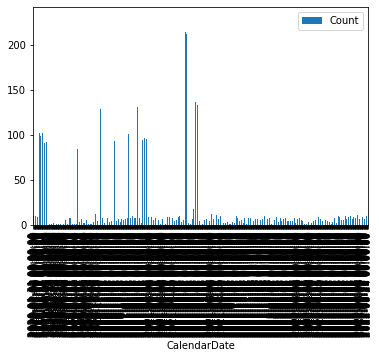

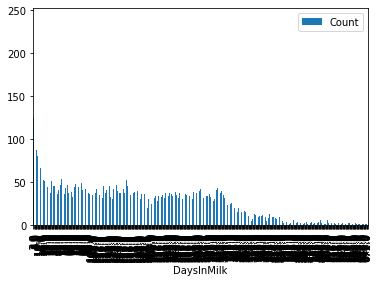

In [17]:
df_date_count.plot(x='CalendarDate', y='Count', kind='bar')
#df_date_count.plot(x='CalendarDate', y='Count', kind='hist')
df_DIM_count.plot(x='DaysInMilk', y='Count', kind='bar')
#df_DIM_count.plot(x='DaysInMilk', y='Count', kind='hist')

In [18]:
'''traffic raw table(contains all traffic events)'''

#target farms: f454e660, a624fb9a
traffic_raw = pd.concat([traffic_f454e660, traffic_a624fb9a])
traffic_raw.drop_duplicates(subset=['Gigacow_Cow_Id', 'TrafficEventDateTime', 'PreviousArea'], keep='first', inplace=True)
#remove irrelevant traffic records, only keep Mjolkfalla,Mjölkfålla
#Unifiy PreviousArea name(vms1 & vms2)
traffic_raw['PreviousArea'].replace(r"(Mj)\w+", "Mjolkfalla", inplace=True, regex=True)
traffic_raw['TrafficResult'].replace("Mjölkfålla", "Mjolkfalla", inplace=True, regex=True)
#traffic_raw['PreviousArea'].replace(r"[Vv]*[Mm]+[Ss]+[^\S]*", "vms", inplace=True, regex=True)

#filter out irrelevant previous areas
previous_areas = ['Foderbord', 'Mjolkfalla', 'Koridor till Sorteringsgrind 2']
traffic_raw = traffic_raw.loc[traffic_raw['PreviousArea'].isin(previous_areas)]
traffic_raw.to_csv(dataDir/'processed/traffic_raw_filter.csv', index=False)
traffic_raw

,Traffic_Id,FarmName_Pseudo,Gigacow_Cow_Id,GroupName,TrafficEventDateTime,PreviousArea,TimeInArea_totalSeconds,TrafficDeviceName,TrafficResult,MilkingInterval_totalSeconds
3,4,f454e660,1825,Vms kor (144 platser),2022-03-26 16:18:58,Foderbord,8580,Ingångsgrind,Avskild Höger till kraftfoder,NaN
4,5,f454e660,5904,Vms kor (144 platser),2022-04-04 09:03:45,Foderbord,2220,Ingångsgrind,Avskild Höger till kraftfoder,NaN
8,9,f454e660,5844,Vms kor (144 platser),2021-11-14 11:49:42,Foderbord,35580,Ingångsgrind,Avskild Vänster till Mjolkfalla,NaN
9,10,f454e660,730,Vms kor (144 platser),2022-04-01 10:19:56,Mjolkfalla,120,Vms 1,"Mjölkning 19,13 kg",37020.0
13,14,f454e660,1241,Vms kor (144 platser),2022-01-13 20:31:25,Foderbord,46980,Ingångsgrind,Avskild Vänster till Mjolkfalla,NaN
...,...,...,...,...,...,...,...,...,...,...
1880186,10721189,a624fb9a,182,VMS 1,2022-07-01 19:20:03,Koridor till Sorteringsgrind 2,0,Sorteringsgrind 2 Trevägsgrind,Separated Middle to Bete,NaN
1880187,10721192,a624fb9a,6197,VMS 1,2022-05-22 10:00:19,Koridor till Sorteringsgrind 2,0,Sorteringsgrind 2 Trevägsgrind,Separated Right to Kraftfoder,NaN
1880191,10721220,a624fb9a,5613,VMS 1,2022-08-05 21:03:37,Koridor till Sorteringsgrind 2,0,Sorteringsgrind 2 Trevägsgrind,Separated Right to Kraftfoder,NaN
1880192,10721224,a624fb9a,32,VMS 1,2021-11-18 05:14:52,Mjolkfalla,60,MS1,Milking 11.52 kg,21780.0
